# Questionário 5



Hugo de Oliveira Borges  nUSP: $11915202$

### Leitura de Dados

In [41]:
# Não mostrar warnings
import warnings
warnings.filterwarnings('ignore')

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
from sklearn.model_selection import train_test_split

import random
random.seed(42)


In [43]:
data = pd.read_csv('../data/BostonHousing.csv', header=(0))

data = data.dropna(axis='rows') #remove NaN

# armazena os nomes das classes
nrow, ncol = data.shape
print("Matriz de atributos: Número de linhas:", nrow, " colunas: ", ncol)
attributes = list(data.columns)

data.head(10)

Matriz de atributos: Número de linhas: 506  colunas:  14


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


1 - Considere a base BostonHousing. Compare o coeficiente $R2$ obtido através de
regressão linear múltipla, Lasso e ridge regression. Para os métodos Lasso e ridge
regression, faça um gráfico $\alpha \times R^{2}$ de conforme feito no notebook da aula. 

Utilizaremos o método dos mínimos quadrados e a biblioteca scikit-learn

In [44]:
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

Conjunto de teste e treinamento

In [45]:
# # divide o conjunto em treinamento e teste
p = 0.2 # fracao e elementos no conjnto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

Ajustar o coeficiente da regressão utilizando o conjunto de treinamento

In [46]:
# modelo de regressão linear múltipla
lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

Queremos valores perto da reta em vermelho

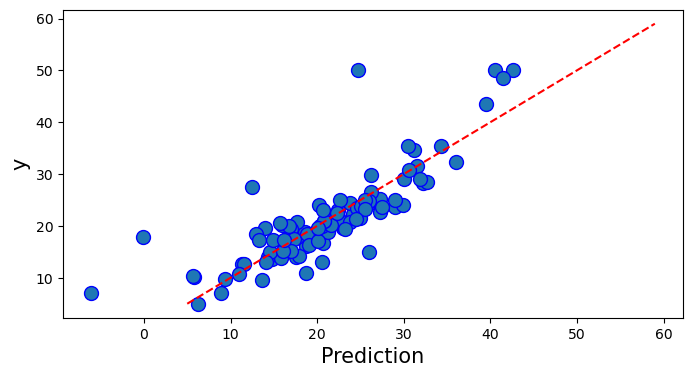

In [47]:
fig = plt.figure(figsize=(8,4))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)

Cálculo do coeficiente $R2$

In [48]:
from sklearn.metrics import r2_score
R2_rlm = r2_score(y_test, y_pred)
print('R2 para o modelo de regressão linear múltipla:', R2_rlm)

R2 para o modelo de regressão linear múltipla: 0.6687594935356325


Regularizar e Calcular o $R2$ para o Lasso

In [49]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

alpha = 1
# notice that we need to normalize the attributes: normalize = True
lasso = Lasso(alpha=alpha, max_iter=100000)
lasso.fit(X_train, y_train)             # Fit a ridge regression on the training data
y_pred = lasso.predict(X_test)           # Use this model to predict the test data

RSME = mean_squared_error(y_test, y_pred)
print("RSME:", RSME)          # Calculate the test MSE

from sklearn.metrics import r2_score
R2_lasso = r2_score(y_test, y_pred)
print('R2:', R2_lasso)

RSME: 24.4094897612997
R2: 0.6671453631686304


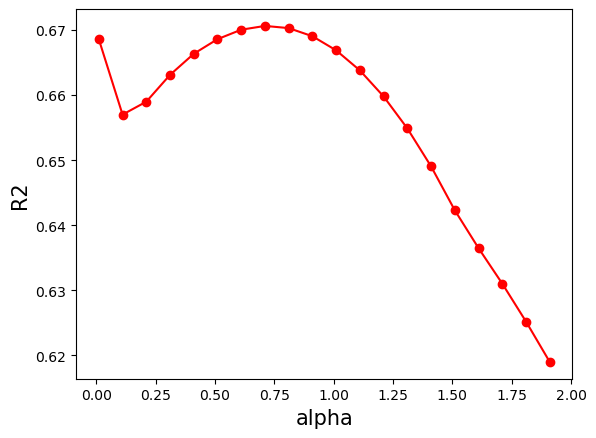

In [50]:
# plot variação do alpha em relação ao R2 para o Lasso
import matplotlib.pyplot as plt
vR2 = []
valpha = []
for alpha in np.arange(0.01,2,0.1):
    lasso = Lasso(alpha=alpha, max_iter=100000)
    lasso.fit(X_train, y_train)             # Fit a ridge regression on the training data
    y_pred = lasso.predict(X_test)           # Use this model to predict the test data
    r2 = r2_score(y_test, y_pred)
    vR2.append(r2)
    valpha.append(alpha)
plt.plot(valpha, vR2, '-ro')
plt.xlabel("alpha", fontsize=15)
plt.ylabel("R2", fontsize=15)
plt.show(True)


Calcular $R2$ para o Ridge

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

# ajusta o modelo ridge regression
ridge = Ridge(alpha = 0)
ridge.fit(X_train, y_train)             # Fit a ridge regression on the training data
y_pred = ridge.predict(X_test)           # Use this model to predict the test data
RSME = mean_squared_error(y_test, y_pred)
print("RSME:", RSME)          # Calculate the test MSE

from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print('R2:', R2)

RSME: 24.29111947497352
R2: 0.668759493535632


In [53]:
# validar o melhor valor de alpha
ridge_cv = RidgeCV(alphas = [0.1, 1.0, 10.0], store_cv_results = True) # Create a ridge regression with built-in cross-validation
ridge_cv.fit(X_train, y_train)          # Fit the model
y_pred = ridge_cv.predict(X_test)        # Use this model to predict the test data
RSME = mean_squared_error(y_test, y_pred)
print("RSME:", RSME)          # Calculate the test MSE
R2 = r2_score(y_test, y_pred)
print('R2 para o modelo Ridge com validação cruzada:', R2)

print('Melhores coeficientes:', ridge_cv.coef_)

RSME: 24.49584561966582
R2 para o modelo Ridge com validação cruzada: 0.6659677905050556
Melhores coeficientes: [-0.92129427  0.55113158  0.0817479   0.74685872 -1.74937519  3.18716624
 -0.18328278 -2.75585734  1.65751243 -1.24757615 -1.95094026  1.10650844
 -3.4960827 ]


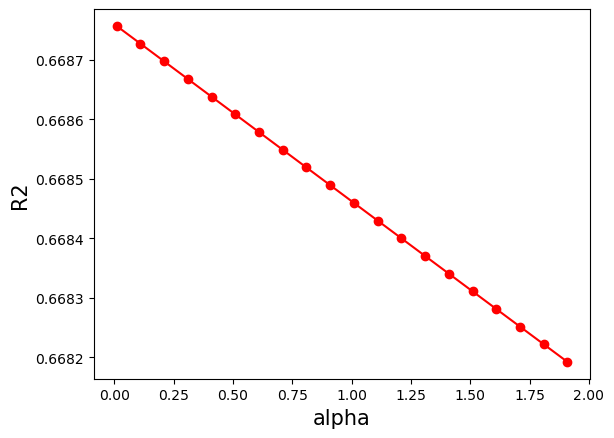

In [54]:
# plot variação do alpha em relação ao R2
import matplotlib.pyplot as plt
vR2 = []
valpha = []
for alpha in np.arange(0.01,2,0.1):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train, y_train)             # Fit a ridge regression on the training data
    y_pred = ridge.predict(X_test)           # Use this model to predict the test data
    r2 = r2_score(y_test, y_pred)
    vR2.append(r2)
    valpha.append(alpha)
plt.plot(valpha, vR2, '-ro')
plt.xlabel("alpha", fontsize=15)
plt.ylabel("R2", fontsize=15)
plt.show(True)

In [55]:
# print comprativo dos R2
print('R2 Regressão Linear Múltipla:', R2_rlm)
print('R2 Lasso:', R2_lasso)
print('R2 Lasso com Validação Cruzada:', R2_lasso)
print('R2 Ridge:', R2)

R2 Regressão Linear Múltipla: 0.6687594935356325
R2 Lasso: 0.6671453631686304
R2 Lasso com Validação Cruzada: 0.6671453631686304
R2 Ridge: 0.6659677905050556


2 - Determine as variáveis que mais influenciam o preço de imóveis em Boston usando
Lasso. 

In [56]:
# Determinar as variáveis que mais influenciam o preço de imóveis em Boston usando Lasso.
lasso = Lasso(alpha = 0.2)
lasso.fit(X_train, y_train)             # Fit a ridge regression on the training data
lasso.coef_

# Mostrar o nome dos coeficientes mais importantes
feature_names = attributes[:-1]  # Exclui o nome da variável alvo

# Obter os índices dos coeficientes mais importantes
indices = np.argsort(np.abs(lasso.coef_))[::-1][:5]

# Features mais importantes
for i in indices:
    print(f"Feature: {feature_names[i]} {lasso.coef_[i]}")




Feature: lstat -3.5821299163074363
Feature: rm 3.362019485134161
Feature: ptratio -1.7395671567149023
Feature: dis -1.6182361269986953
Feature: nox -1.0530861560781464


3 - Considere os dados gerados com o código a seguir. Usando regularização, ajuste o
grau do polinômio que define o modelo mais adequado. 

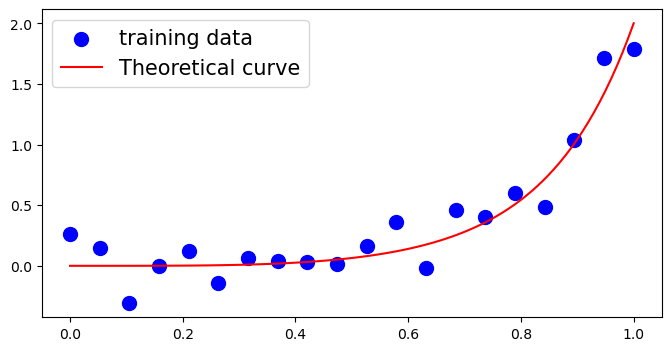

In [57]:
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(10)
#função para gerar os dados
def function(x):
	y = x**4 + x**9
	return y

# training set
N_train = 20
sigma = 0.2
x_train= np.linspace(0, 1,N_train)
y_train = function(x_train) + np.random.normal(0,sigma, N_train)
x_train = x_train.reshape(len(x_train), 1)
fig = plt.figure(figsize=(8, 4))
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", s=100, label="training data")

# test set
N_test = 20
x_test=np.linspace(0, 1,N_test)
y_test = function(x_test) + np.random.normal(0,sigma, N_test)
x_test = x_test.reshape(len(x_test), 1)

# Curva teorica
xt = np.linspace(0,1,100)
yt = function(xt)
plt.plot(xt,yt, '-r', label="Theoretical curve")
plt.legend(fontsize=15)
plt.show(True) 

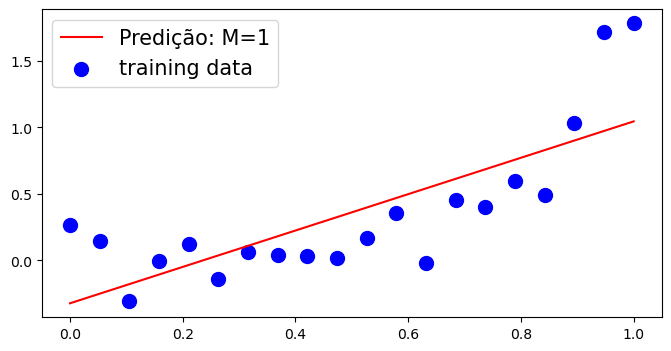

In [58]:
from sklearn import linear_model

# usa regressão linear para ajustar o modelo
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

# preve os valores de y a partir de x
xplot=np.linspace(0,1,200)
xplot=xplot.reshape(len(xplot), 1)
Y_pred = model.predict(xplot)

# mostra os resultados
fig = plt.figure(figsize=(8, 4))
plt.plot(xplot, Y_pred, label='Predição: M=1', color = 'red')
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", s=100, 
            label="training data")
plt.legend(fontsize=15)
plt.show(True)


In [59]:
from sklearn.preprocessing import PolynomialFeatures
import sklearn.linear_model as linear_model
# Define a matriz de atributos
poly3 = PolynomialFeatures(degree=3)
X = poly3.fit_transform(x_train) 
# print('X^0             X^1          Xˆ2         Xˆ3')
# print(X)
model = linear_model.LinearRegression()
model.fit(X,y_train)
# graficamos a curva obtida a partir da predição
Xplot=poly3.fit_transform(xplot)

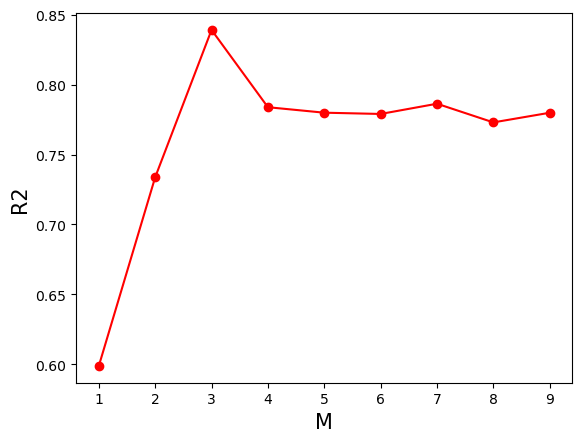

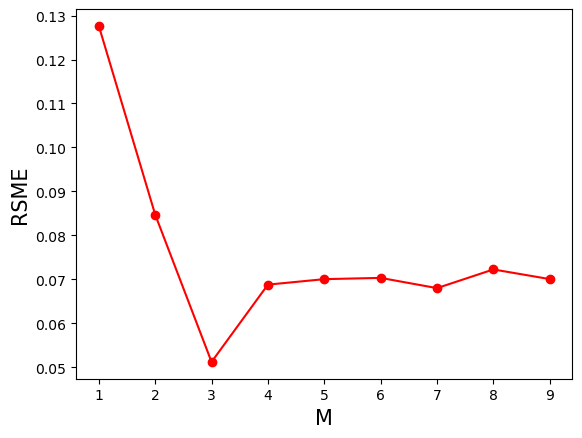

In [60]:
# Verificar o melhor grau do polinomio para regularização
import matplotlib.pyplot as plt
vR2 = []
vM = []
for M in range(1, 10):
    poly = PolynomialFeatures(degree=M)
    X = poly.fit_transform(x_train)
    model = linear_model.LinearRegression()
    model.fit(X,y_train)
    Xtest=poly.fit_transform(x_test)
    y_pred = model.predict(Xtest)
    r2 = r2_score(y_test, y_pred)
    vR2.append(r2)
    vM.append(M)
plt.plot(vM, vR2, '-ro')
plt.xlabel("M", fontsize=15)
plt.ylabel("R2", fontsize=15)
plt.show(True)

# RMSE
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
vRSME = []
vM = []
for M in range(1, 10):
    poly = PolynomialFeatures(degree=M)
    X = poly.fit_transform(x_train)
    model = linear_model.LinearRegression()
    model.fit(X,y_train)
    Xtest=poly.fit_transform(x_test)
    y_pred = model.predict(Xtest)
    RSME = mean_squared_error(y_test, y_pred)
    vRSME.append(RSME)
    vM.append(M)
plt.plot(vM, vRSME, '-ro')
plt.xlabel("M", fontsize=15)
plt.ylabel("RSME", fontsize=15)
plt.show(True)

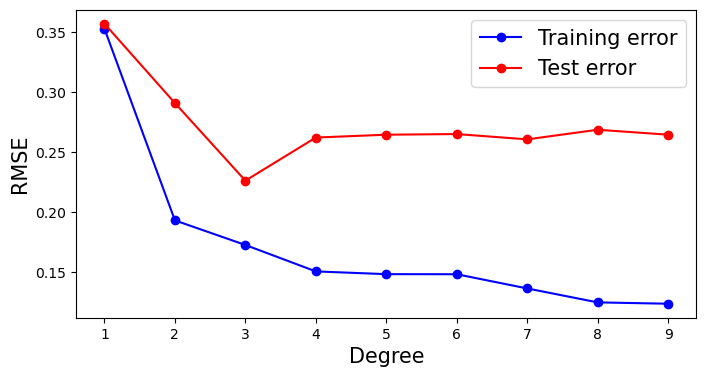

In [61]:
#Funcao para calcular o erro quadrático médio
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

# lista que armazena os erros de acordo com o grau do polinomio
training_errors = []
test_errors = []
degree = [] # armazena os graus do polinomio
for M in np.arange(1,10):   
    # modelo a ser usado: regressão linear
    model = linear_model.LinearRegression()
    # transforma os dados para obter a matriz onde cada coluna i armazena x**i
    poly = PolynomialFeatures(degree=M) 
    X_train = poly.fit_transform(x_train)
    # realiza a regressão linear no conjunto de treinamento
    model.fit(X_train,y_train)
    Y_pred = model.predict(X_train)
    error_train = rmse(Y_pred,y_train)
    training_errors.append(error_train)

    # realiza a regressão linear no conjunto de teste
    X_test=poly.fit_transform(x_test)
    Y_pred2 = model.predict(X_test)
    error_test = rmse(Y_pred2, y_test)
    test_errors.append(error_test)
    degree.append(M)
fig = plt.figure(figsize=(8, 4))
plt.plot(degree, training_errors, 'b-o', label = 'Training error')
plt.plot(degree, test_errors, 'r-o', label= 'Test error')
plt.xlabel("Degree", fontsize = 15)
plt.ylabel("RMSE", fontsize = 15)
plt.legend(fontsize = 15)
plt.show(True)

4 - Realize a classificação da base Vehicles usando validação cruzada e o método
grid_search para escolher os melhores hiperparâmetros do modelo regressão logística e
knn. 

In [62]:
random.seed(42) # define the seed (important to reproduce the results)

data = pd.read_csv('../data/Vehicle.csv', header=(0))

data = data.dropna(axis='rows') #remove NaN

# armazena os nomes das classes
nrow, ncol = data.shape
print("Matriz de atributos: Número de linhas:", nrow, " colunas: ", ncol)
attributes = list(data.columns)

data.head(10)

Matriz de atributos: Número de linhas: 846  colunas:  19


,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
5,107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183,bus
6,97,43,73,173,65,6,153,42,19,143,176,361,172,66,13,1,200,204,bus
7,90,43,66,157,65,9,137,48,18,146,162,281,164,67,3,3,193,202,van
8,86,34,62,140,61,7,122,54,17,127,141,223,112,64,2,14,200,208,van
9,93,44,98,197,62,11,183,36,22,146,202,505,152,64,4,14,195,204,saab


In [63]:
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

In [64]:
# # divide o conjunto em treinamento e teste
p = 0.2 # fracao e elementos no conjnto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

Encontrar o melhor valor do hiperparâmetro $k$

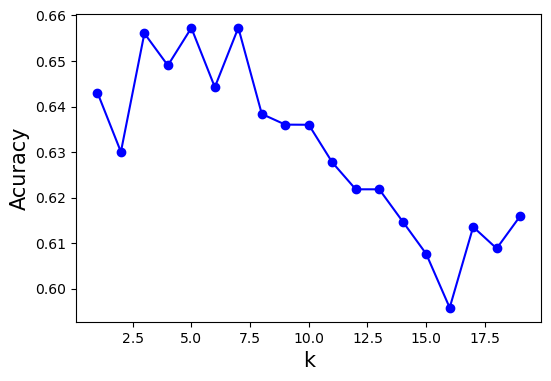

Melhor k: 7


In [65]:
#Validaçaõ cruzada para encontrar o melhor k

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from pandas import DataFrame
from sklearn.model_selection import cross_validate

# monta a matrix de atributos
d = np.column_stack((X,np.transpose(y)))
# converte para o formato dataframe do Pandas
data = DataFrame(data = d, columns=[attributes])
features_names = ['X1', 'X2']
class_labels = np.unique(y)

nkf = 5 #number of folds
vk = [] # armazena os valores de k
vscore = []
for k in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    # realiza a validação cruzada
    cv = cross_validate(model, X, y, cv=nkf)
    #print('k:', k, 'accurace:', cv['test_score'].mean())
    vscore.append(cv['test_score'].mean()) 
    vk.append(k)

plt.figure(figsize=(6,4))
plt.plot(vk, vscore, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Acuracy', fontsize = 15)
plt.show(True)
best_k = np.argmax(vscore)+1
print('Melhor k:', best_k)

In [66]:
# Encontrar o melhor k usando grid search
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 20)}
model = KNeighborsClassifier(metric = 'euclidean')
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X, y)
print("Melhor k:", grid.best_params_['n_neighbors'])


Melhor k: 7


Encontrar o melhor hiperparâmetro para Regressão Logística

In [83]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Modelo base
logreg = LogisticRegression(max_iter=100)

# Definindo grade de hiperparâmetros
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],      # força da regularização
}

# Validação cruzada
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# GridSearchCV
grid = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    cv=kf,
    scoring='accuracy',
    n_jobs=-1
)

# Treinando o modelo
grid.fit(X, y)

# Resultados
print("Melhores parâmetros:", grid.best_params_)
print("Melhor score (acurácia média CV):", grid.best_score_)

Melhores parâmetros: {'C': 0.1}
Melhor score (acurácia média CV): 0.7198039215686275


5 - Verifique se o número de folds, usado na validação cruzada, influencia na classificação
da base winequality-red. Use o modelo de regressão logística. 

In [84]:
data = pd.read_csv('../data/winequality-red.csv', header=(0))

data = data.dropna(axis='rows') #remove NaN

# armazena os nomes das classes
nrow, ncol = data.shape
print("Matriz de atributos: Número de linhas:", nrow, " colunas: ", ncol)
attributes = list(data.columns)

data.head(10)

Matriz de atributos: Número de linhas: 1599  colunas:  12


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [85]:
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

# # divide o conjunto em treinamento e teste
p = 0.2 # fracao e elementos no conjnto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

In [90]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Modelo base
logreg = LogisticRegression(max_iter=100)

# Definindo grade de hiperparâmetros
param_grid = {
    'C': [0.1],      # força da regularização
}
# Validação cruzada para vários valores de kfold
for kfold in [5, 10, 15, 20, 25 ]:
    print(f"\nResultados para kfold = {kfold}")
    # Validação cruzada
    kf = KFold(n_splits=kfold, shuffle=True, random_state=42)

    # GridSearchCV
    grid = GridSearchCV(
        estimator=logreg,
        param_grid=param_grid,
        cv=kf,
        scoring='accuracy',
        n_jobs=-1
    )

    # Treinando o modelo
    grid.fit(X, y)

    # Resultados
    print("Melhores parâmetros:", grid.best_params_)
    print("Melhor score (acurácia média CV):", grid.best_score_)


Resultados para kfold = 5


Melhores parâmetros: {'C': 0.1}
Melhor score (acurácia média CV): 0.5822844827586208

Resultados para kfold = 10
Melhores parâmetros: {'C': 0.1}
Melhor score (acurácia média CV): 0.580373427672956

Resultados para kfold = 15
Melhores parâmetros: {'C': 0.1}
Melhor score (acurácia média CV): 0.5748310115793804

Resultados para kfold = 20
Melhores parâmetros: {'C': 0.1}
Melhor score (acurácia média CV): 0.5797863924050632

Resultados para kfold = 25
Melhores parâmetros: {'C': 0.1}
Melhor score (acurácia média CV): 0.5810515873015872


A pouca variação da acurácia pode ser causada por uma das duas seguintes opções:
*   O desempenho do modelo não depende muito da divisão dos dados
*   Base de dados suficientemente grande e balanceada
